In [1]:
# customer count and value, frequency of purchase, average purchase size, ROi

This notebook aims to segment customers by their Recency, Frequency, and Monetary purchases in order for the company to plan to determine the best way to reach the most amount of customers by providing sales or discounts appeal to a certain segment then analyze the return on investment. This notbook will not analyze the ROI but simply segment the customer base in to groups At Risk, Recent Customers, Big Spenders, Frequent Low Spenders.

In [2]:
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('retail_sales_dataset.csv', index_col=0)
df

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
998,2023-10-29,CUST998,Female,23,Beauty,4,25,100


In [4]:
df = df.reset_index()

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

# Gender

In [7]:
gender_vc = df['Gender'].value_counts().reset_index()
gender_vc

,Gender,count
0,Female,510
1,Male,490


<Axes: xlabel='Gender', ylabel='count'>

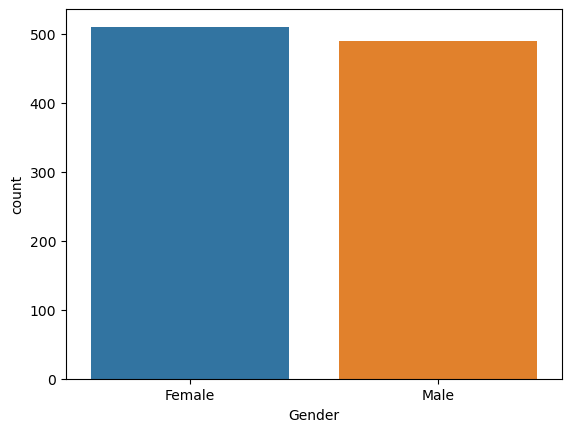

In [8]:
sns.barplot(gender_vc, x='Gender', y='count')

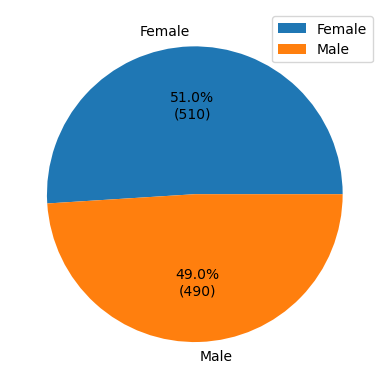

In [9]:
plt.pie(gender_vc['count'], labels=gender_vc['Gender'], autopct=autopct_format(gender_vc['count']))
plt.legend();

# Age

In [10]:
df['Age'].describe()

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64

In [11]:
bins = [17, 26, 35, 45, 55, 80]

In [12]:
cut_bins = pd.cut(df['Age'], bins=bins, labels=[
    f'{bins[0]} to {bins[1]}', 
    f'{bins[1]} to {bins[2]}',
    f'{bins[2]} to {bins[3]}',
    f'{bins[3]} to {bins[4]}',
    f'{bins[4]} to {bins[5]}'
])
cut_bins

0      26 to 35
1      17 to 26
2      45 to 55
3      35 to 45
4      26 to 35
         ...   
995    55 to 80
996    45 to 55
997    17 to 26
998    35 to 45
999    45 to 55
Name: Age, Length: 1000, dtype: category
Categories (5, object): ['17 to 26' < '26 to 35' < '35 to 45' < '45 to 55' < '55 to 80']

In [13]:
age_bins_vc = cut_bins.value_counts().reset_index()
age_bins_vc

,Age,count
0,45 to 55,229
1,35 to 45,202
2,55 to 80,195
3,17 to 26,191
4,26 to 35,183


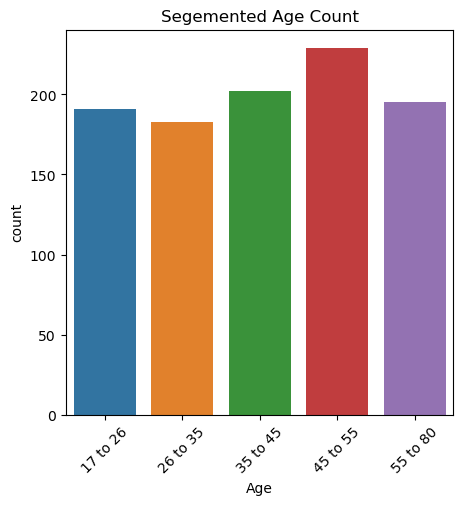

In [14]:
plt.figure(figsize=(5,5))
sns.barplot(age_bins_vc, x='Age', y='count')
plt.xticks(rotation=45)
plt.title('Segemented Age Count');

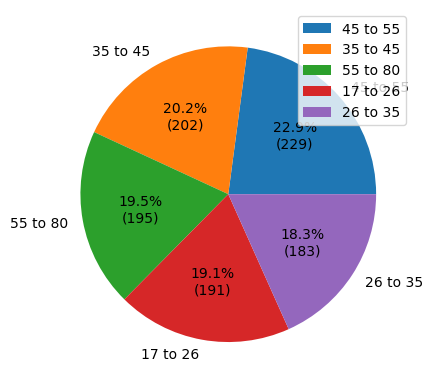

In [15]:
plt.pie(age_bins_vc['count'], labels=age_bins_vc['Age'], autopct=autopct_format(age_bins_vc['count']))
plt.legend();

In [16]:
age_vc = df['Age'].value_counts()
age_vc = age_vc.reset_index()

In [17]:
age_vc = age_vc.sort_values(by='Age').reset_index(drop=True)
age_vc

,Age,count
0,18,21
1,19,21
2,20,21
3,21,20
4,22,27
5,23,24
6,24,15
7,25,20
8,26,22
9,27,23


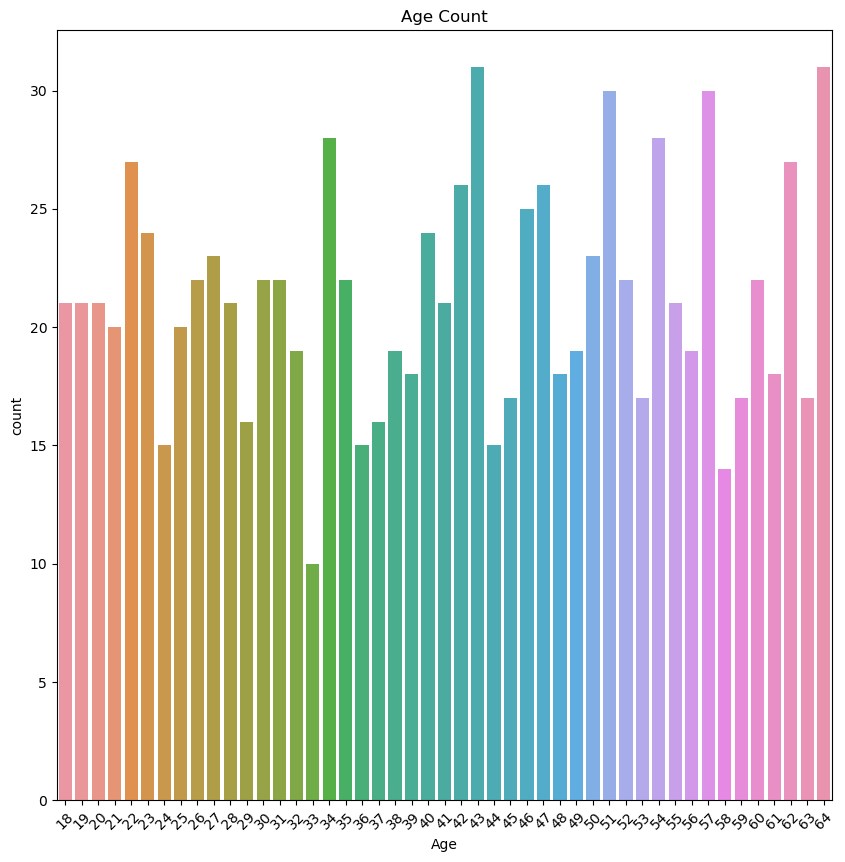

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(age_vc, x='Age', y='count', )
plt.xticks(rotation=45)
plt.title('Age Count');

# Porduct Category

In [19]:
prod_cat_vc = df['Product Category'].value_counts().reset_index()
prod_cat_vc

,Product Category,count
0,Clothing,351
1,Electronics,342
2,Beauty,307


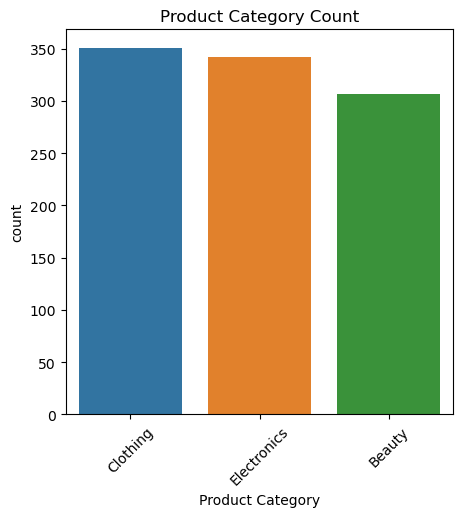

In [20]:
plt.figure(figsize=(5,5))
sns.barplot(prod_cat_vc, x='Product Category', y='count', )
plt.xticks(rotation=45)
plt.title('Product Category Count');

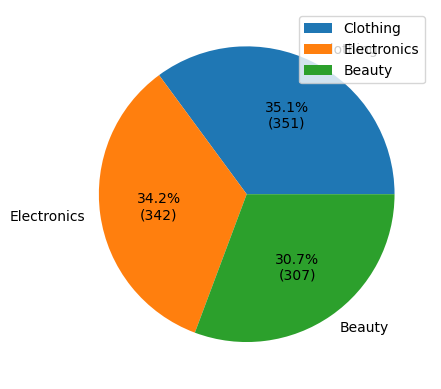

In [21]:
plt.pie(prod_cat_vc['count'], labels=prod_cat_vc['Product Category'], autopct=autopct_format(prod_cat_vc['count']))
plt.legend();

# Quantity

In [22]:
df['Quantity'].describe()

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64

In [23]:
quantity_vc = df['Quantity'].value_counts().reset_index()
quantity_vc

,Quantity,count
0,4,263
1,1,253
2,2,243
3,3,241


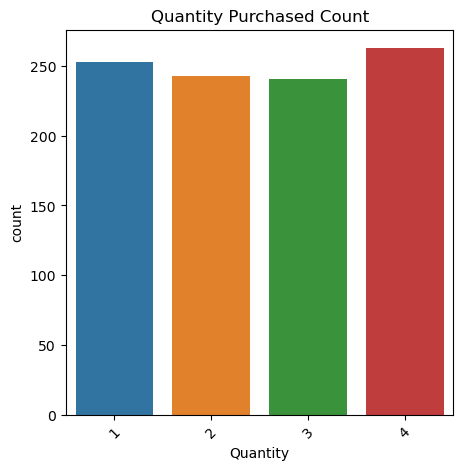

In [24]:
plt.figure(figsize=(5,5))
sns.barplot(quantity_vc, x='Quantity', y='count', )
plt.xticks(rotation=45)
plt.title('Quantity Purchased Count');

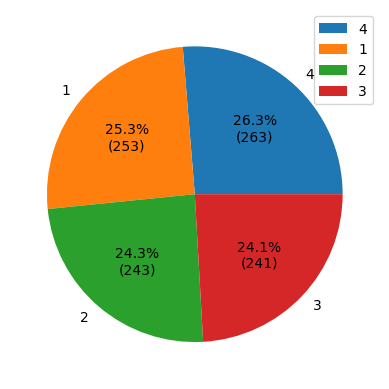

In [25]:
plt.pie(quantity_vc['count'], labels=quantity_vc['Quantity'], autopct=autopct_format(quantity_vc['count']))
plt.legend();

# Customer Data

In [26]:
df['New_CustomerID'] = np.random.randint(0,500,size=1000)

In [27]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,New_CustomerID
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,55
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,414
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,167
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,137
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,45
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,295
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,172
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,284
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,420


In [28]:
df['Customer ID'] = df['New_CustomerID'].apply(lambda x: f'CUST{str(x).zfill(3)}')
df['Customer ID']

0      CUST055
1      CUST414
2      CUST167
3      CUST137
4      CUST045
        ...   
995    CUST295
996    CUST172
997    CUST284
998    CUST420
999    CUST443
Name: Customer ID, Length: 1000, dtype: object

In [29]:
df.drop(columns=['New_CustomerID'], axis=1, inplace=True)

In [30]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST055,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST414,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST167,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST137,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST045,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST295,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST172,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST284,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST420,Female,36,Electronics,3,50,150


In [31]:
customer_data = df.groupby('Customer ID').agg({
    'Date': lambda x: (df['Date'].max()-x.max()).days,
    'Transaction ID': 'count',
    'Total Amount': 'sum'
})

In [32]:
customer_data

,Date,Transaction ID,Total Amount
Customer ID,,,
CUST000,86,1,200
CUST001,171,3,510
CUST002,38,2,930
CUST003,23,3,2700
CUST004,71,5,3150
...,...,...,...
CUST495,30,4,4320
CUST496,75,3,2225
CUST497,226,2,690


In [33]:
customer_data.rename(columns={
    'Date': 'Recency',
    'Transaction ID': 'Frequency',
    'Total Amount': 'Monetary'
}, inplace=True)

In [34]:
customer_data

,Recency,Frequency,Monetary
Customer ID,,,
CUST000,86,1,200
CUST001,171,3,510
CUST002,38,2,930
CUST003,23,3,2700
CUST004,71,5,3150
...,...,...,...
CUST495,30,4,4320
CUST496,75,3,2225
CUST497,226,2,690


In [35]:
quantiles = customer_data.quantile(q=[.25,.5,.75]).to_dict()
quantiles

{'Recency': {0.25: 43.25, 0.5: 98.5, 0.75: 208.5},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'Monetary': {0.25: 200.0, 0.5: 900.0, 0.75: 1615.0}}

In [36]:
def RScore (x, q1, q2, q3):
    if x <= q1:
        return 4
    elif q1<x<=q2:
        return 3
    elif q2<x<=q3:
        return 2
    else:
        return 1

In [37]:
def FMScore (x, q1, q2, q3):
    if x <= q1:
        return 1
    elif q1<x<=q2:
        return 2
    elif q2<x<=q3:
        return 3
    else:
        return 4

In [38]:
customer_data['R_Score'] = customer_data['Recency'].apply(
    RScore, 
    args=( 
        quantiles['Recency'][0.25],
        quantiles['Recency'][0.5],
        quantiles['Recency'][0.75]
    )
)

In [39]:
customer_data['F_Score'] = customer_data['Frequency'].apply(
    FMScore, 
    args=( 
        quantiles['Frequency'][0.25],
        quantiles['Frequency'][0.5],
        quantiles['Frequency'][0.75]
    )
)

In [40]:
customer_data['M_Score'] = customer_data['Monetary'].apply(
    FMScore, 
    args=( 
        quantiles['Monetary'][0.25],
        quantiles['Monetary'][0.5],
        quantiles['Monetary'][0.75]
    )
)

In [41]:
customer_data['RFM_Score'] = customer_data['R_Score'].astype(str) + customer_data['F_Score'].astype(str) + customer_data['M_Score'].astype(str)
customer_data['RFM_Score']

Customer ID
CUST000    311
CUST001    232
CUST002    423
CUST003    434
CUST004    344
          ... 
CUST495    444
CUST496    334
CUST497    122
CUST498    223
CUST499    311
Name: RFM_Score, Length: 430, dtype: object

In [42]:
customer_data

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Customer ID,,,,,,,
CUST000,86,1,200,3,1,1,311
CUST001,171,3,510,2,3,2,232
CUST002,38,2,930,4,2,3,423
CUST003,23,3,2700,4,3,4,434
CUST004,71,5,3150,3,4,4,344
...,...,...,...,...,...,...,...
CUST495,30,4,4320,4,4,4,444
CUST496,75,3,2225,3,3,4,334
CUST497,226,2,690,1,2,2,122


# KMeans Modeling

In [43]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(customer_data[['R_Score', 'F_Score', 'M_Score']])

In [44]:
inertia = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

In [45]:
inertia

[1290.0000000000005,
 723.9293533089001,
 517.8292499500934,
 394.27092267699084,
 334.9936915523013,
 283.91003846513007,
 249.12753665201254,
 224.22743749469157,
 214.86950806604395,
 193.03444680075665]

<Axes: >

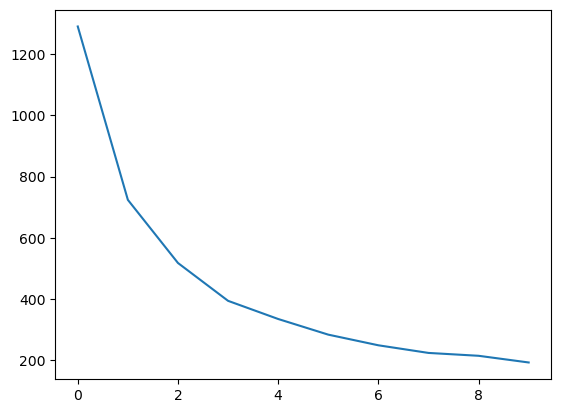

In [46]:
sns.lineplot(inertia)

In [47]:
kmeans = KMeans(n_clusters=4)

In [48]:
customer_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [49]:
customer_data

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Cluster
Customer ID,,,,,,,,
CUST000,86,1,200,3,1,1,311,2
CUST001,171,3,510,2,3,2,232,3
CUST002,38,2,930,4,2,3,423,2
CUST003,23,3,2700,4,3,4,434,0
CUST004,71,5,3150,3,4,4,344,0
...,...,...,...,...,...,...,...,...
CUST495,30,4,4320,4,4,4,444,0
CUST496,75,3,2225,3,3,4,334,0
CUST497,226,2,690,1,2,2,122,1


In [50]:
customer_data.groupby('Cluster').agg({
    'R_Score': 'mean', 
    'F_Score': 'mean', 
    'M_Score': 'mean', 
}).reset_index()

,Cluster,R_Score,F_Score,M_Score
0,0,3.252174,3.634783,3.582609
1,1,1.368421,1.298246,1.324561
2,2,3.530435,1.860870,1.860870
3,3,1.616279,2.081395,3.220930


In [51]:
segment_names = {
    0: 'At Risk',
    1: 'Recent Customers',
    2: 'Big Spenders',
    3: 'Frequent Low Spenders'
}

In [52]:
customer_data['Segment'] = customer_data['Cluster'].map(segment_names)

In [53]:
customer_data

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Cluster,Segment
Customer ID,,,,,,,,,
CUST000,86,1,200,3,1,1,311,2,Big Spenders
CUST001,171,3,510,2,3,2,232,3,Frequent Low Spenders
CUST002,38,2,930,4,2,3,423,2,Big Spenders
CUST003,23,3,2700,4,3,4,434,0,At Risk
CUST004,71,5,3150,3,4,4,344,0,At Risk
...,...,...,...,...,...,...,...,...,...
CUST495,30,4,4320,4,4,4,444,0,At Risk
CUST496,75,3,2225,3,3,4,334,0,At Risk
CUST497,226,2,690,1,2,2,122,1,Recent Customers


In [54]:
seg_df = customer_data['Segment'].value_counts().reset_index()
seg_df

,Segment,count
0,Big Spenders,115
1,At Risk,115
2,Recent Customers,114
3,Frequent Low Spenders,86


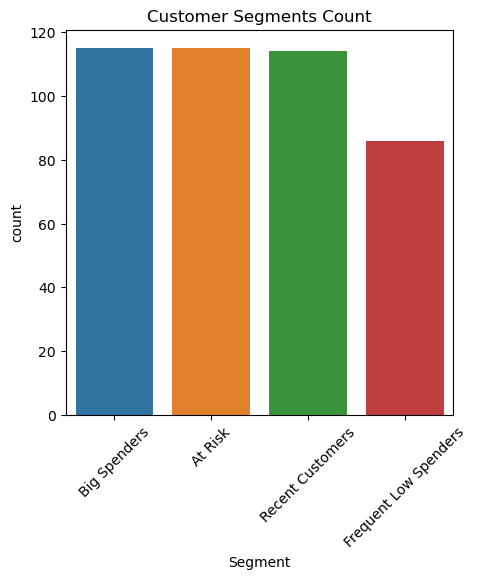

In [55]:
plt.figure(figsize=(5,5))
sns.barplot(seg_df, x='Segment', y='count', )
plt.xticks(rotation=45)
plt.title('Customer Segments Count');

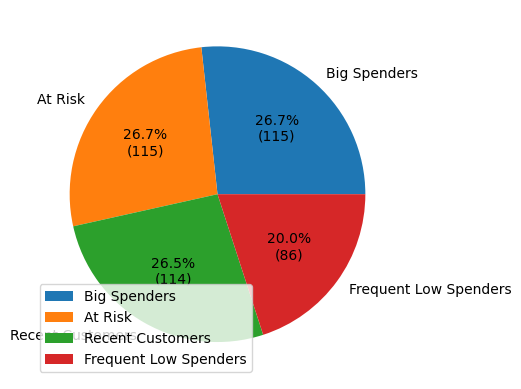

In [56]:
plt.pie(seg_df['count'], labels=seg_df['Segment'], autopct=autopct_format(seg_df['count']))
plt.legend();

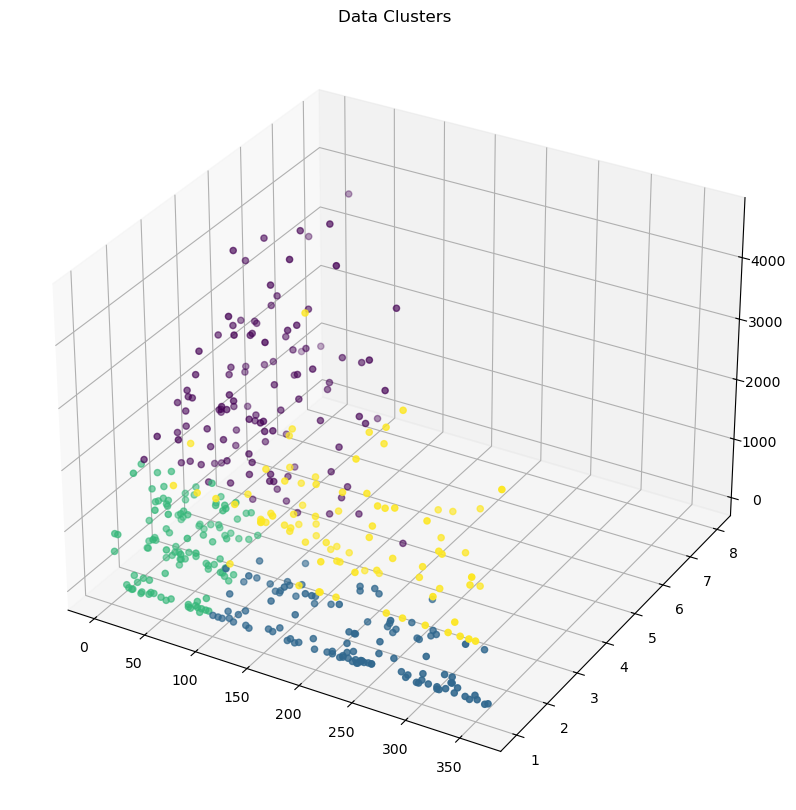

In [57]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(
    customer_data['Recency'], 
    customer_data['Frequency'], 
    customer_data['Monetary'], 
    c=customer_data['Cluster'],
)
plt.title('Data Clusters')
plt.show();

- Yellow = Frequent Low Spenders
- Blue = At Risk
- Green = Recent Customers
- Purple = Big Spenders